## Prepare python environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the Statslog (Heart) Dataset (1 points)

---


We will use heart dataset from UCI machine learning repository. Details of this data can be found [here](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)). 
The dataset contains the following features with their corresponding feature types:
1. age in years (real)
2. sex (binary; 1=male/0=female)
3. cp: chest pain type (categorical)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) (real)
5. chol: serum cholestorol in mg/dl (real)
6. fbs: (fasting blood sugar > 120 mg/dl) (binary; 1=true/0=false)
7. restecg: resting electrocardiographic results (categorical)
8. thalach: maximum heart rate achieved (real)
9. exang: exercise induced angina (1 = yes; 0 = no) (binary)
10. oldpeak: ST depression induced by exercise relative to rest (real)
11. slope: the slope of the peak exercise ST segment (ordinal)
12. ca: number of major vessels colored by flourosopy (real)
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. (categorical)

The objective is to determine whether a person has heart disease or not based on these features.

Note: We will use a subset of the above features because the [scikit-learn implementation of Decision Trees does not support categorical variables](https://scikit-learn.org/stable/modules/tree.html#tree). 

### Loading the dataset

In [3]:
# Download and load the dataset
import os
if not os.path.exists('heart.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/heart.csv 
df = pd.read_csv('heart.csv')

# keep real valued features and the target feature
ind_non_categorical_features=np.array([0,3,4,7,9,11,-1])
non_categorical_features=df.columns[ind_non_categorical_features]

df=df[non_categorical_features]

# Display the first five instances in the dataset
df.head()

--2021-09-19 02:08:23--  https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  10.77K  --.-KB/s    in 0s      

2021-09-19 02:08:23 (106 MB/s) - ‘heart.csv’ saved [11024/11024]



,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1


### Check the data type for each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   trestbps  303 non-null    int64  
 2   chol      303 non-null    int64  
 3   thalach   303 non-null    int64  
 4   oldpeak   303 non-null    float64
 5   ca        303 non-null    int64  
 6   target    303 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.7 KB


#### There are a total of 303 entries in this dataset. First 13 columns are features and the last column indicates whether the person has heart disease or not.

#### Look at some statistics of the data using the `describe` function in pandas.

In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


1. Count tells us the number of Non-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

#### Look at distribution of some features across the population. See [here](https://seaborn.pydata.org/generated/seaborn.distplot.html) for details. These have been done for you.

<AxesSubplot:xlabel='thalach', ylabel='Density'>

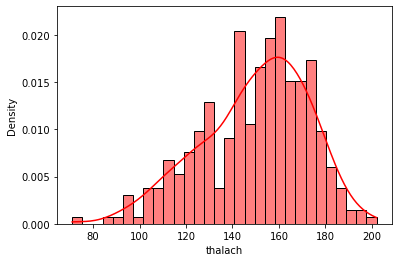

In [ ]:
sns.histplot(df['thalach'],bins=30,color='red',stat="density",kde=True)

<AxesSubplot:xlabel='chol', ylabel='Density'>

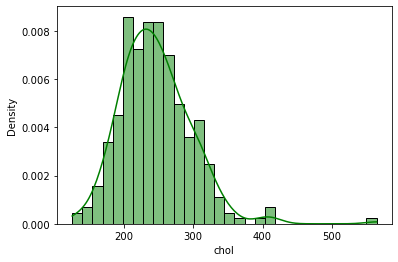

In [ ]:
sns.histplot(df['chol'],bins=30,color='green',stat='density',kde=True)

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

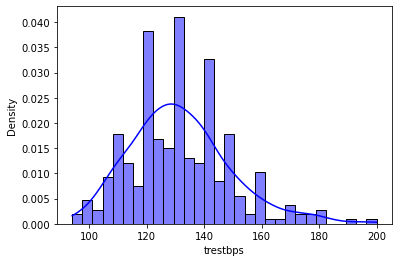

In [ ]:
sns.histplot(df['trestbps'],bins=30,color='blue',stat='density',kde=True)

#### Plot histogram of heart disease with age. This has been done for you.

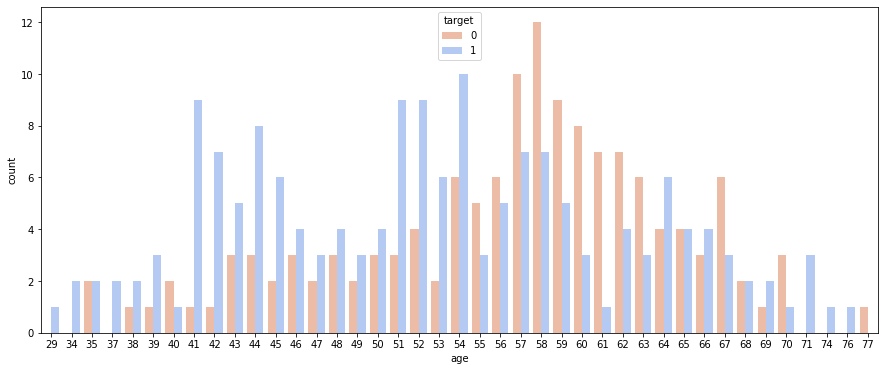

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='coolwarm_r')
plt.show()

#### Extract target and descriptive features (0.5 points)

In [5]:
# Store all the features from the data in X
X= df.drop('target',axis=1)
# Store all the labels in y
y= df['target']

In [6]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()

#### Create training and test datasets (0.5 points)

Split the data into training and test sets using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for testing. 

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

## Training Decision Tree-based Classifiers (9 points)


### Exercise 1: Learning a Decision Tree (5 points)

#### We will use the `sklearn` library to train a Decision Tree classifier. Review ch.4 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details. 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# tree visualization helper function 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

"""
clf: DecisionTreeClassifier

Returns a bytes object representing the image of the tree 
"""
def get_tree_image(clf):
    dot_data = StringIO()
    feature_names=df.drop('target',axis=1).columns
    class_names=["No heart disease", "Has heart disease"]
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=feature_names, 
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    

    return graph.create_png()

#### Exercise 1a: Fit and interpret a decision tree. (3 points)

#### Fit Decision trees using the Gini index and entropy-based impurity measure. 

#### Set the random_state to the value defined above. Keep all other parameters at their default values. 

#### Report the training and test set accuracies for each classifier.

In [ ]:

entropy_clf=DecisionTreeClassifier(criterion='entropy',random_state=random_state)
entropy_clf.fit(X_train,y_train)
print('entropy-based criterion')
print("train accuracy: %.2f" %entropy_clf.score(X_train,y_train))
print("test accuracy: %.2f"%entropy_clf.score(X_test,y_test))

gini_clf=DecisionTreeClassifier(criterion='gini',random_state=random_state)
gini_clf.fit(X_train,y_train)
print('gini index')
print("train accuracy: %.2f" %gini_clf.score(X_train,y_train))
print("test accuracy: %.2f"%gini_clf.score(X_test,y_test))


entropy-based criterion
train accuracy: 1.00
test accuracy: 0.70
gini index
train accuracy: 1.00
test accuracy: 0.69


#### Visualize the Decision Tree with the best test performance.

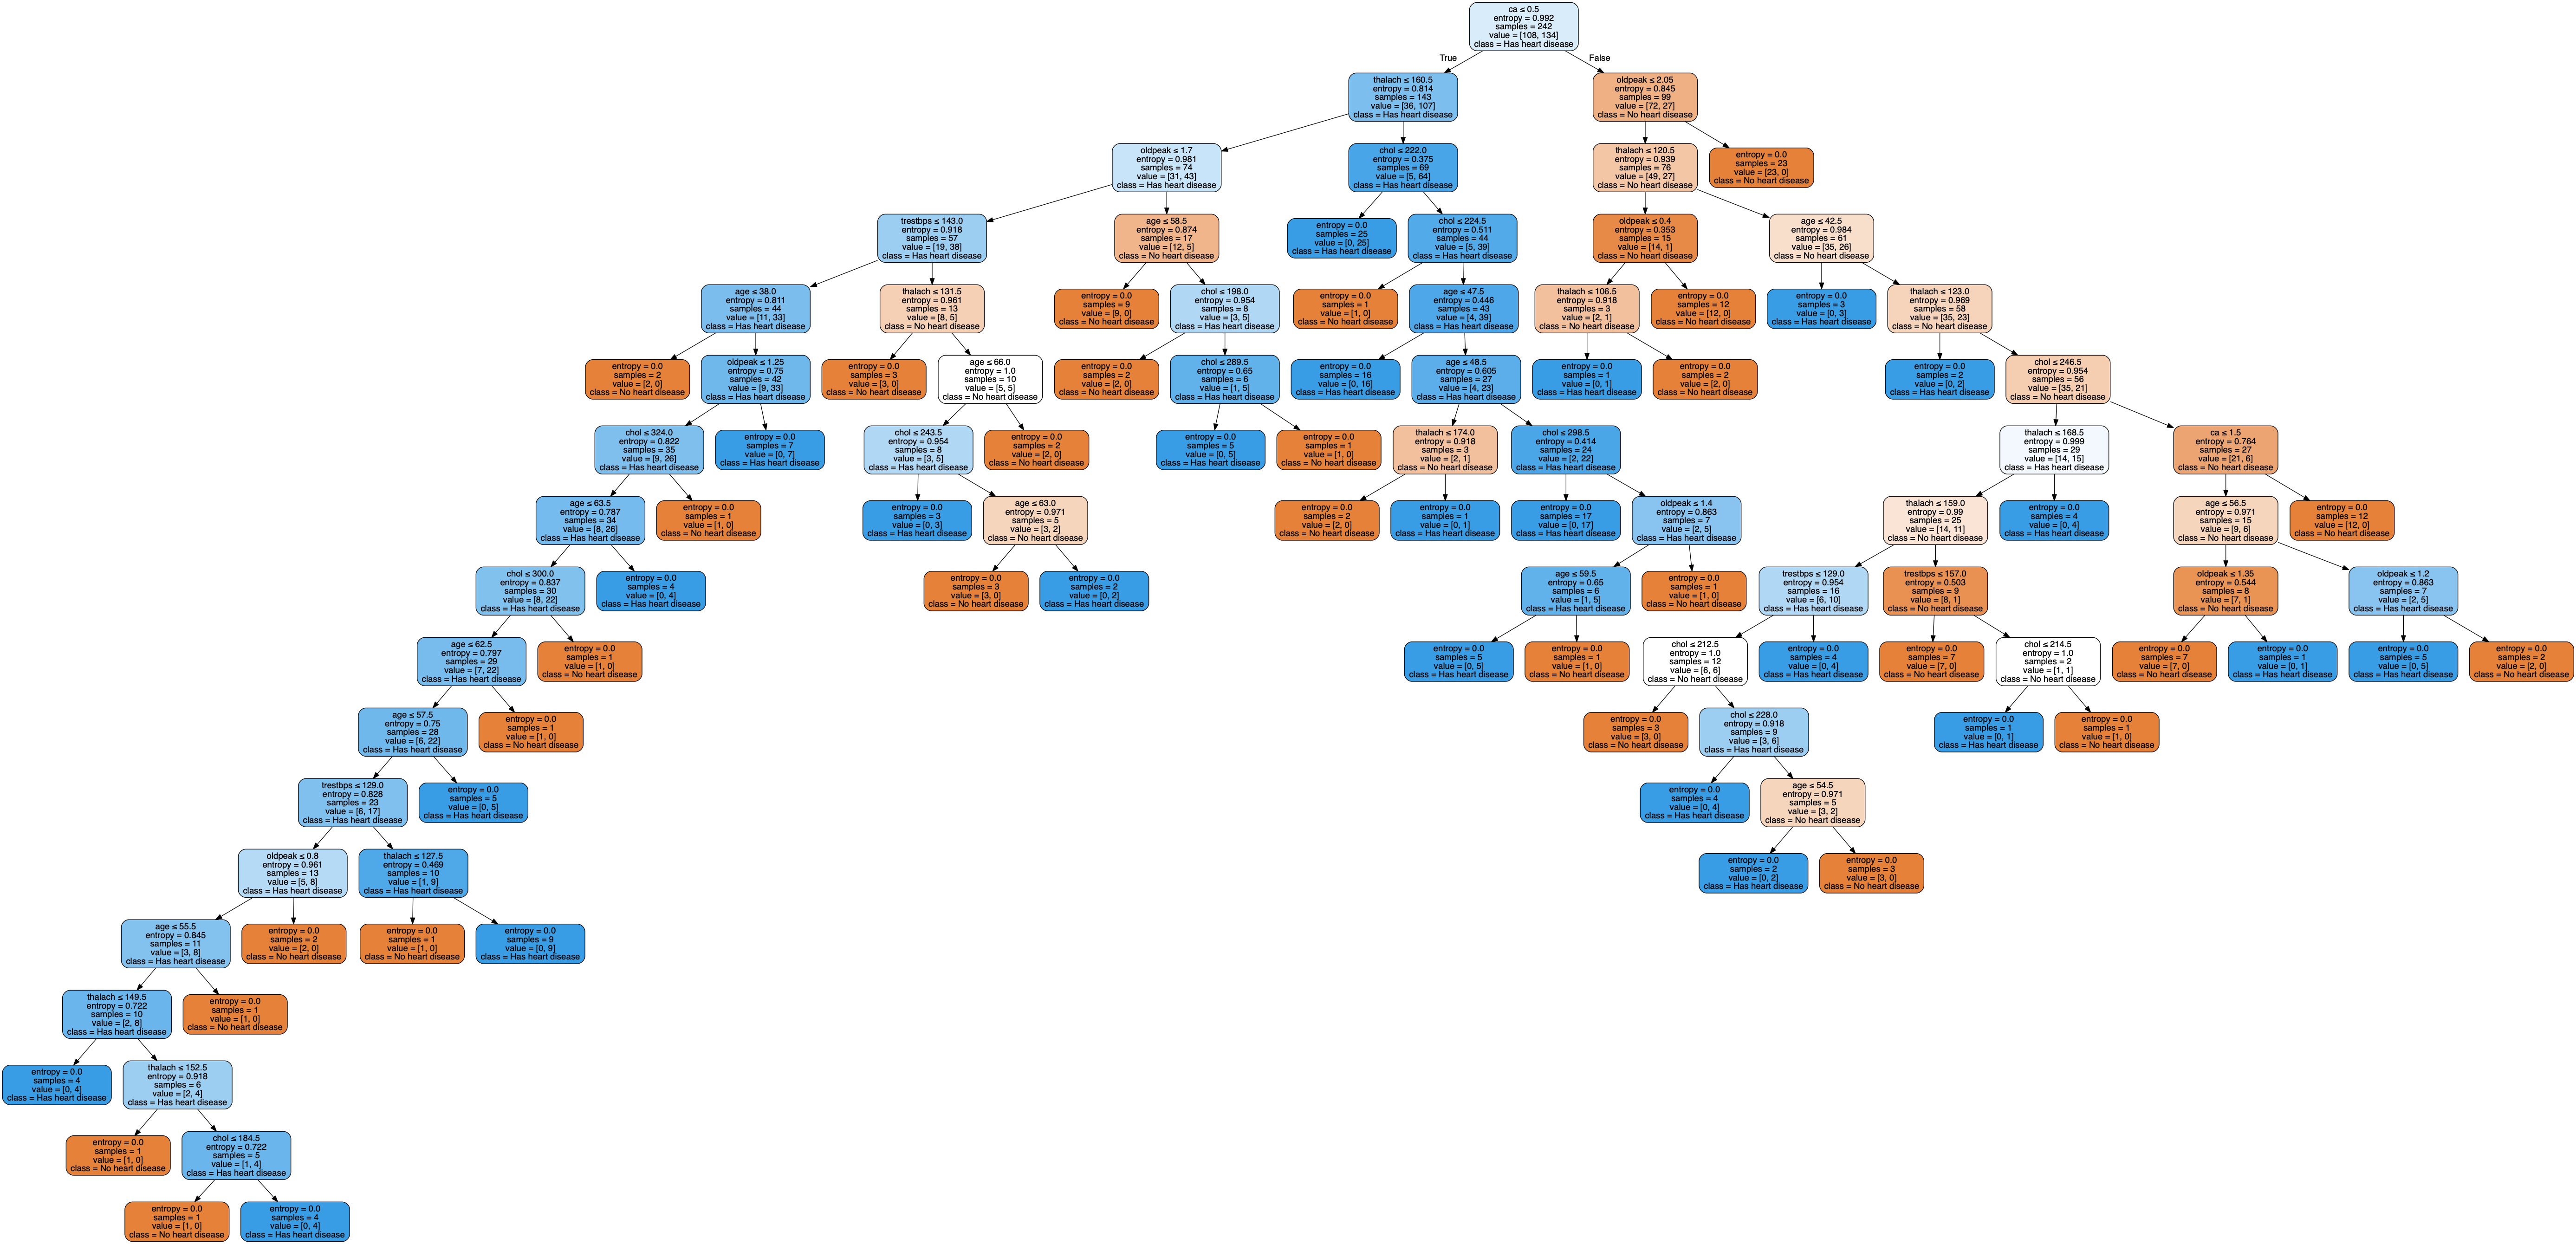

In [ ]:
best_clf=entropy_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

#### Indicate the most informative descriptive feature (with the threshold) and briefly explain why this is the most informative (from an algorithmic viewpoint). 

The feature ca (the number of major blood vessels colored by fluorosopy), with a threshold of $\leq 0.5$, is the most informative feature because it has the highest information gain.

#### Briefly comment on the tree's depth and what factors may contribute to the shallowness/complexity of the tree. 


The tree depth is 17 (the max. distance between the root and a leaf node). The tree is deep because the algorithm grows the tree till it is consistent with the training dataset (100% training accuracy). This encourages the tree to overfit to irrelevant patterns and noise in the training data, resulting in nodes with partitions contains few instances. 

#### Show how one can interpret the tree by specifying the rule from its left most branch. 

If the number of major vessels colored by fluorosopy (ca) is $\leq 0.5$ (i.e., 0), the max. heart rate achieved (thalach) is $\leq 160.5$, the ST depression level (oldpeak) is $\leq 1.7$, resting blood pressure (trestbps) is $\leq 143$, and age is $\leq 38$, then the patient does not have heart disease.

#### Exercise 1b: Prune a decision tree. (2 points)

#### Next, let's try pruning the tree to see if we can improve the classifier's generalization performance.

####  Preprune a decision tree by varying the `max_depth` among {None (no depth control), 1,3,5,7}.

#### Set the criterion to entropy and the random_state to the value defined above. Keep all other parameters at their default values. 

#### Report the training and test set accuracies for each classifier.

In [ ]:

for max_depth in [1,3,5,7,None]:
    clf=DecisionTreeClassifier(criterion='entropy',random_state=random_state,max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    print("max depth: %d" %(max_depth if max_depth else clf.get_depth()))
    print("training accuracy: %.2f" %train_score)
    print("testing accuracy: %.2f" %test_score)


max depth: 1
training accuracy: 0.74
testing accuracy: 0.72
max depth: 3
training accuracy: 0.77
testing accuracy: 0.75
max depth: 5
training accuracy: 0.83
testing accuracy: 0.74
max depth: 7
training accuracy: 0.88
testing accuracy: 0.70
max depth: 17
training accuracy: 1.00
testing accuracy: 0.70


#### Analyze the effect of increasing tree depth on training and test performance.

Not limiting the tree depth results in perfect performance on the training dataset since the tree is grown until all leaf nodes are pure. Reducing tree depth degrades training performance because more leaf nodes are impure. 

Increasing tree depth from 1 to 3 improves test performance because the model is better fitting the training dataset. Increasing the depth from further degrades test performance due to increased overfitting.

### Exercise 2: Learning an Ensemble of Decision Trees (4 points)

#### We will use the `sklearn` library to implement bagging and boosting. Review ch.4 and read more on [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Exercise 2a: Fit a Random Forest. (2 points)

#### Fit different Random Forest classifiers by varying the number of trees among {10, 100, 500,1000}. 

#### Set the `criterion` to entropy and set the random_state to the value defined above. Keep all other parameters at their default values. 

#### Report the test set accuracies for each classifier.

In [ ]:
for n_estimator in [10,100,500,1000]:
    clf=RandomForestClassifier(n_estimators=n_estimator,criterion="entropy",random_state=random_state)
    clf.fit(X_train,y_train)
    print("# trees: %d" %n_estimator)
    print("testing acc: %.2f" %clf.score(X_test,y_test))

# trees: 10
testing acc: 0.72
# trees: 100
testing acc: 0.74
# trees: 500
testing acc: 0.75
# trees: 1000
testing acc: 0.74


#### Comment on the effect of increasing the number of trees on test performance. Compare the performance of the best performing Random Forest classifier against the Decision Tree Classifier trained with entropy (Ex. 1a) and explain any difference. 

Increasing the number of trees from 10 to 500 improves performance, possibly because of increased variance among the decision trees resulting from bagging and subspace sampling. Adding more trees does not seem to help.

The best performing Random Forest classifier performs better than the the Decision Tree Classifier. This is because Random Forests combine bagging and subspace sampling to introduce diversity among the decision trees, whose predictions are then aggregated through majority voting to mitigate overfitting.

#### Exercise 2b: Fit a Gradient Boosted Decision Tree (GBDT). (2 points)

#### Fit different GBDTs by varying the number of boosting steps/trees added among {5,50,100,200}. 

#### Set the `n_iter_no_change` to 100, `validation_fraction=0.2`, and random_state to the value defined above. Keep all other parameters at their default values. 

#### Report the training and test set accuracies for each classifier.

In [ ]:
for n_estimator in [5,50,100, 200]:
    clf=GradientBoostingClassifier(n_estimators=n_estimator,random_state=random_state,n_iter_no_change=100, validation_fraction=0.2)
    clf.fit(X_train,y_train)
    print("# trees: %d" %n_estimator)
    print("training acc: %.2f" %clf.score(X_train,y_train))
    print("testing acc: %.2f" %clf.score(X_test,y_test))

# trees: 5
training acc: 0.80
testing acc: 0.70
# trees: 50
training acc: 0.88
testing acc: 0.74
# trees: 100
training acc: 0.92
testing acc: 0.77
# trees: 200
training acc: 0.92
testing acc: 0.75


#### Comment on the effect of increasing the number of trees on test performance. Compare the performance of the best performing GBDT against that of the best performing Random Forest classifier (Ex. 2a) and Decision Tree classifier trained with entropy (Ex. 1a). 

Increasing the number of trees from 5 to 100 improves test performance because the added decision trees help the ensemble better fit the training data by correcting errors made by ensemble models from previous boosting stages. Adding more decision trees to the ensemble degrades test performance due to increased overfitting (this is evident upon looking at more sigfigs for the training accuracy).   

The best performing GBDT performs better than the best performing Random Forest classifier and performs better than the Decision Tree classifier, but more controlled experiments (e.g., controlling for hyperparameters like max_depth) are needed to validate this. 